In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [32]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [33]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare (engine, reflect=True)

In [34]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [35]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
max_date = session.query (Measurement.date).order_by(Measurement.date.desc()).first()

In [58]:
max_year = int(max_date[0][0:4])

In [59]:
max_month = int(max_date[0][5:7])

In [60]:
max_day = int(max_date[0][8:])

In [64]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date (max_year,max_month,max_day) - dt.timedelta (days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [65]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query (Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_ago).all()

In [66]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_data_df = pd.DataFrame (prcp_data)
prcp_data_df.set_index('date', inplace=True)
prcp_data_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [67]:
# Sort the dataframe by date
prcp_data_df = prcp_data_df.sort_values(by='date', ascending=True)

<function matplotlib.pyplot.show(close=None, block=None)>

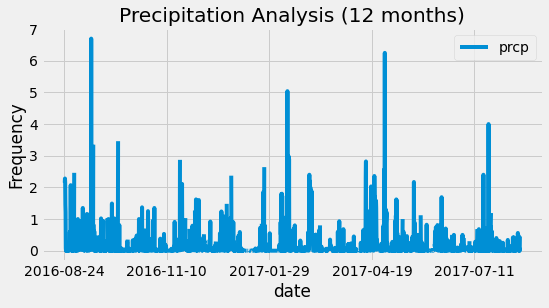

In [68]:

# Use Pandas Plotting with Matplotlib to plot the data
plot = prcp_data_df.plot(figsize=(8,4))
plot.set_title("Precipitation Analysis (12 months)")
plot.set_ylabel ("Frequency")
plt.savefig("Images/precipitation.png")
plt.show



In [69]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [70]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query (Measurement.station).distinct().count()
print (f"Total number stations: {number_of_stations}")

Total number stations: 9


In [71]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query (Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print (f"Most Active Stations")
active_stations

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [72]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = [func.min(Measurement.tobs),
               func.max(Measurement.tobs),
               func.avg(Measurement.tobs)]
session.query(*temperature).filter(Measurement.station=='USC00519281').all()



[(54.0, 85.0, 71.66378066378067)]

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results =  session.query(Measurement.tobs).\
                          filter(Measurement.station == 'USC00519281').\
                          filter(Measurement.date >= '2017,8,23').all()

results

[(72.0),
 (70.0),
 (64.0),
 (63.0),
 (63.0),
 (62.0),
 (70.0),
 (70.0),
 (62.0),
 (62.0),
 (63.0),
 (65.0),
 (69.0),
 (77.0),
 (70.0),
 (74.0),
 (69.0),
 (72.0),
 (71.0),
 (69.0),
 (71.0),
 (71.0),
 (72.0),
 (72.0),
 (69.0),
 (70.0),
 (66.0),
 (65.0),
 (69.0),
 (68.0),
 (68.0),
 (68.0),
 (59.0),
 (60.0),
 (70.0),
 (73.0),
 (75.0),
 (64.0),
 (59.0),
 (59.0),
 (62.0),
 (68.0),
 (70.0),
 (73.0),
 (79.0),
 (75.0),
 (65.0),
 (70.0),
 (74.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (69.0),
 (61.0),
 (67.0),
 (65.0),
 (72.0),
 (71.0),
 (73.0),
 (72.0),
 (77.0),
 (73.0),
 (67.0),
 (62.0),
 (64.0),
 (67.0),
 (66.0),
 (81.0),
 (69.0),
 (66.0),
 (67.0),
 (69.0),
 (66.0),
 (68.0),
 (65.0),
 (74.0),
 (69.0),
 (72.0),
 (73.0),
 (72.0),
 (71.0),
 (76.0),
 (77.0),
 (76.0),
 (74.0),
 (68.0),
 (73.0),
 (71.0),
 (74.0),
 (75.0),
 (70.0),
 (67.0),
 (71.0),
 (67.0),
 (74.0),
 (77.0),
 (78.0),
 (67.0),
 (70.0),
 (69.0),
 (69.0),
 (74.0),
 (78.0),
 (71.0),
 (67.0),
 (68.0),
 (67.0),
 (76.0),
 (69.0),
 

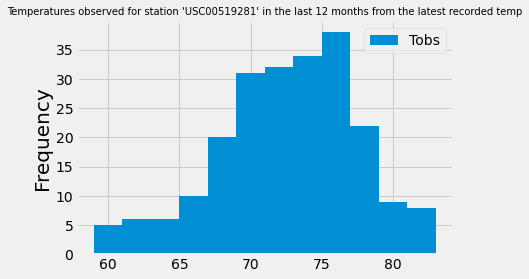

In [73]:
df = pd.DataFrame(results , columns = ['Tobs'])


df.hist( bins = 12)

plt.ylabel("Frequency", fontsize = 20)
plt.title("Temperatures observed for station 'USC00519281' in the last 12 months from the latest recorded temp" ,
           size = 10)
labels = ["Tobs"]
plt.legend(labels)


plt.show()

# Close session

In [ ]:
# Close Session
session.close()